# Kaggle -  Loan Dataset
## Classification
[Link](https://www.kaggle.com/burak3ergun/loan-data-set)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%html
<style> table {float:left} </style>

## Problem Statement

## About Company:
### <p>Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.</p>
### </br>
### <p>Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.</p>

## Variable Description

|Variable|Description    |
|:--------|:---------------|
|Loan_ID |Unique Loan ID |
|Gender|Male/ Female   |
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|Loan approved (Y/N)|

In [3]:
#Read the train_loan_predection.csv into pandas DataFrame
loan_df = pd.read_csv('./data/loan/train_loan_predection.csv')

# Let's explore the data

In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
len(loan_df)

614

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### Set the Index, this is not mandatory

In [8]:
loan_df = loan_df.set_index('Loan_ID')

In [9]:
loan_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [10]:
loan_df.loc['LP001008']

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          6000
CoapplicantIncome         0.0
LoanAmount              141.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: LP001008, dtype: object

### Check for Null values

In [11]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_df[loan_df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N


In [13]:
loan_df[loan_df.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


### Let's drop all of the rows if one of the cell has null value

In [14]:
loan_df = loan_df.dropna(how='any')

In [15]:
len(loan_df)

480

In [23]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Verify column data types and convert if necessary

In [13]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
loan_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
loan_df.Dependents.apply(lambda x:str(x)).value_counts()

0      345
1      102
2      101
3+      51
nan     15
Name: Dependents, dtype: int64

In [20]:
# Convert Dependents column to integers
loan_df['Dependents'] = loan_df.Dependents.apply(lambda x: int(str(x).replace('+','')) if pd.notnull(x) else (x))

In [21]:
# Now Dependents colum has descrete values
loan_df.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [22]:
loan_df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
# add Dummy column 'Count', will be used for aggregations
loan_df['Count'] = 1

## Analyze numeric columns

In [25]:
loan_df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot: >

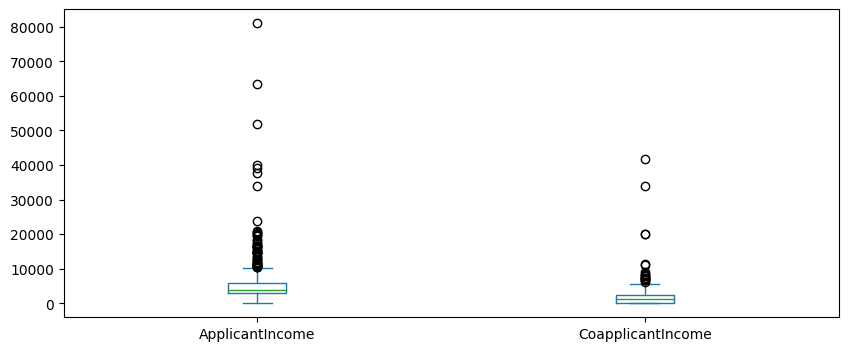

In [30]:
columns = ['ApplicantIncome', 'CoapplicantIncome']
loan_df[columns].plot(kind='box',figsize=(10,4))

<AxesSubplot: ylabel='Frequency'>

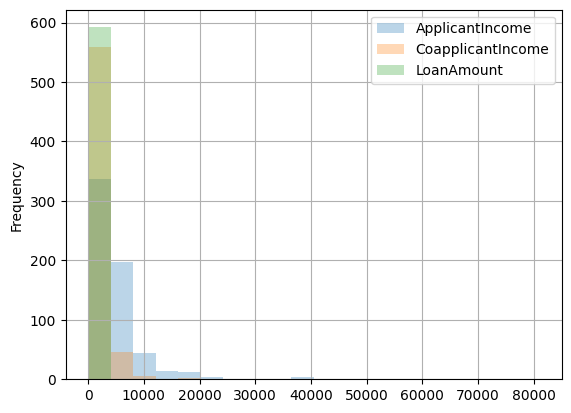

In [28]:
columns = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
loan_df[columns].plot(kind='hist',bins=20,grid=True,alpha=0.3)

## Analyze categorical columns

<AxesSubplot: >

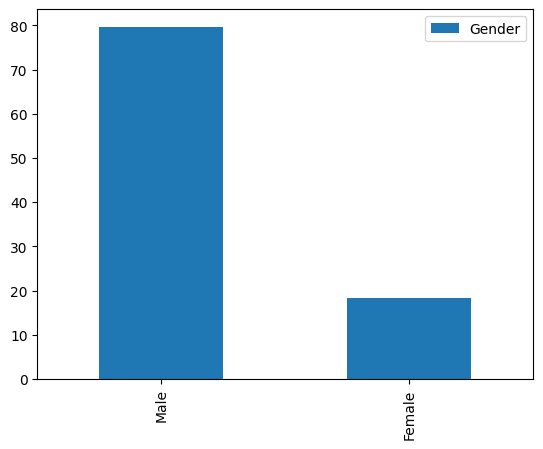

In [31]:
column_name = 'Gender'
pd.DataFrame(loan_df[column_name].value_counts()*100/len(loan_df)).plot(kind='bar')

## Let's find out how our target variable Loan_Status is related with other categorical variables

<AxesSubplot: xlabel='Credit_History'>

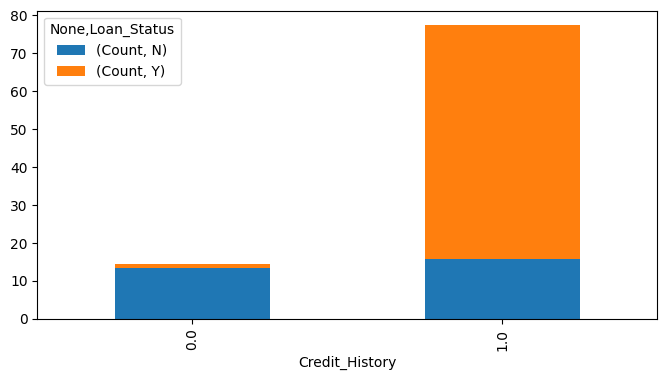

In [35]:
#column_name = "Married"
#column_name = "Gender"
#column_name = "Dependents"
#column_name = "Loan_Amount_Term"
#column_name = "Self_Employed"
#column_name = "Education"
column_name = 'Credit_History'

columns = [column_name,'Loan_Status','Count']

grp_df = loan_df[columns].groupby([column_name,'Loan_Status']).sum()
grp_df = grp_df.unstack()*100/len(loan_df)
grp_df.plot(kind='bar',stacked=True,figsize=(8,4))

## Loan has been sancationed to very few people who has Credit_History as 0

In [36]:
# Loan sanctioned to few of them even though their credit history is not 
loan_df[(loan_df.Credit_History==0) & (loan_df.Loan_Status=='Y')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count
Loan_ID,,,,,,,,,,,,,
LP001431,Female,No,0.0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,1
LP001536,Male,Yes,3.0,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,1
LP001677,Male,No,2.0,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y,1
LP001882,Male,Yes,3.0,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y,1
LP002068,Male,No,0.0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y,1
LP002449,Male,Yes,0.0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y,1
LP002706,Male,Yes,1.0,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y,1


## Addition of derived data

In [37]:
loan_status_map = {'Y':1,'N':0}
loan_df['Loan_Status_int'] = loan_df.Loan_Status.map(loan_status_map)

In [38]:
loan_df['LoanAmount_pct'] = loan_df.LoanAmount *100 / loan_df.ApplicantIncome

In [39]:
pd.cut(loan_df['LoanAmount_pct'],[0,1,2,3,4,5,6,8,10,20,100]).value_counts().sort_index()

(0, 1]        23
(1, 2]        71
(2, 3]       183
(3, 4]       141
(4, 5]        88
(5, 6]        46
(6, 8]        25
(8, 10]        3
(10, 20]       7
(20, 100]      5
Name: LoanAmount_pct, dtype: int64

In [40]:
loan_df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

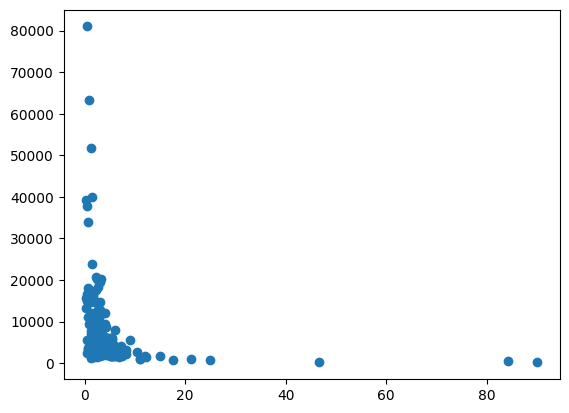

In [41]:
plt.scatter(loan_df.LoanAmount_pct,loan_df.ApplicantIncome)
plt.show()

In [42]:
loan_df[loan_df.LoanAmount_pct > 10]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,LoanAmount_pct
Loan_ID,,,,,,,,,,,,,,,
LP001259,Male,Yes,1.0,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N,1,0,11.000000
LP001267,Female,Yes,2.0,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N,1,0,12.119013
LP001644,NaN,Yes,0.0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,1,1,24.925816
LP001722,Male,Yes,0.0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N,1,0,90.000000
LP001835,Male,Yes,0.0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban,N,1,0,12.050360
LP001843,Male,Yes,1.0,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y,1,1,10.484780
LP002342,Male,Yes,2.0,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,1,0,14.937500
LP002345,Male,Yes,0.0,Graduate,No,1025,2773.0,112.0,360.0,1.0,Rural,Y,1,1,10.926829
LP002502,Female,Yes,2.0,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y,1,1,46.666667


<AxesSubplot: ylabel='Frequency'>

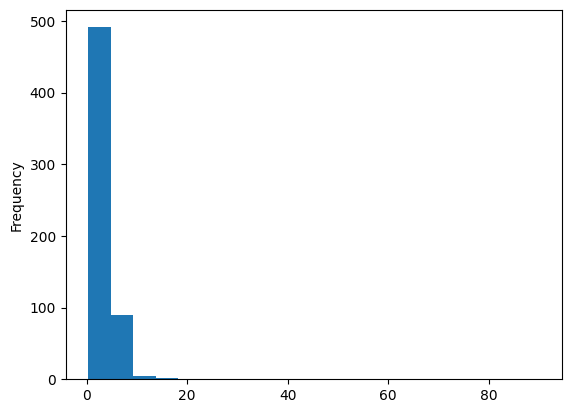

In [44]:
loan_df.LoanAmount_pct.plot(kind='hist',bins=20)

In [45]:
loan_df['TotalIncome'] = loan_df.ApplicantIncome + loan_df.CoapplicantIncome

<AxesSubplot: ylabel='Frequency'>

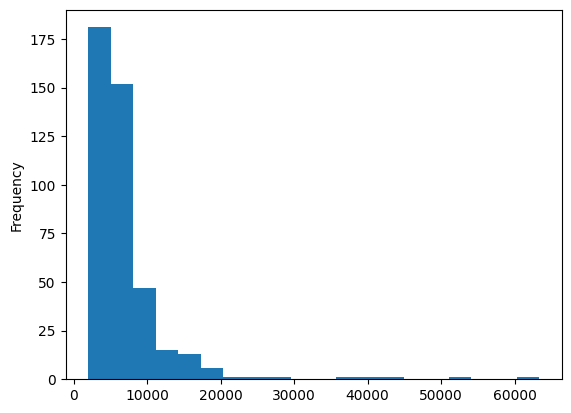

In [46]:
loan_df[loan_df.Loan_Status=='Y'].TotalIncome.plot(kind='hist',bins=20)

<AxesSubplot: ylabel='Frequency'>

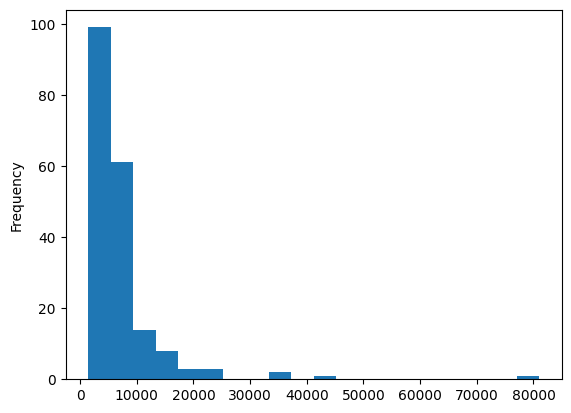

In [47]:
loan_df[loan_df.Loan_Status=='N'].TotalIncome.plot(kind='hist',bins=20)

In [48]:
loan_df[(loan_df.TotalIncome > 30000) & (loan_df.Loan_Status=='N')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,LoanAmount_pct,TotalIncome
Loan_ID,,,,,,,,,,,,,,,,
LP001637,Male,Yes,1.0,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,1,0,0.768185,33846.0
LP002317,Male,Yes,3.0,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,1,0,0.444444,81000.0
LP002893,Male,No,0.0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,1,0,4.901961,35673.0
LP002949,Female,No,3.0,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,1,0,84.134615,42083.0


In [49]:
temp_df = loan_df[(loan_df.Credit_History==1) & (loan_df.Loan_Status=='N')]
print(len(temp_df))
temp_df.head()

97


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,LoanAmount_pct,TotalIncome
Loan_ID,,,,,,,,,,,,,,,,
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,2.792930,6091.0
LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,0,2.717857,23809.0
LP001029,Male,No,0.0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,1,0,6.152186,4693.0
LP001038,Male,Yes,0.0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,1,0,2.721506,4887.0
LP001086,Male,No,0.0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N,1,0,2.427184,1442.0


In [50]:
loan_df[loan_df.Loan_Status=='N'].describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,LoanAmount_pct,TotalIncome
count,187,192,186.000000,192,183,192.000000,192.000000,181.000000,186.000000,179.000000,192,192,192.0,192.0,181.000000,192.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN,NaN
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Rural,N,NaN,NaN,NaN,NaN
freq,150,113,NaN,140,157,NaN,NaN,NaN,NaN,NaN,69,192,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.752688,NaN,NaN,5446.078125,1877.807292,151.220994,344.064516,0.541899,NaN,NaN,1.0,0.0,4.447999,7323.885417
std,NaN,NaN,1.020396,NaN,NaN,6819.558528,4384.060103,85.862783,69.238921,0.499639,NaN,NaN,0.0,0.0,8.992571,7739.774247
min,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN,1.0,0.0,0.378469,1442.000000
25%,NaN,NaN,0.000000,NaN,NaN,2885.000000,0.000000,100.000000,360.000000,0.000000,NaN,NaN,1.0,0.0,2.299830,4162.750000
50%,NaN,NaN,0.000000,NaN,NaN,3833.500000,268.000000,129.000000,360.000000,1.000000,NaN,NaN,1.0,0.0,3.030303,5289.500000
75%,NaN,NaN,1.000000,NaN,NaN,5861.250000,2273.750000,176.000000,360.000000,1.000000,NaN,NaN,1.0,0.0,4.338795,7570.750000


In [51]:
loan_df[loan_df.Loan_Status=='Y'].describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,LoanAmount_pct,TotalIncome
count,414,419,413.000000,422,399,422.000000,422.000000,411.000000,414.000000,385.000000,422,422,422.0,422.0,411.000000,422.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN,NaN
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,NaN,NaN,NaN,NaN
freq,339,285,NaN,340,343,NaN,NaN,NaN,NaN,NaN,179,422,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.767554,NaN,NaN,5384.068720,1504.516398,144.294404,341.072464,0.981818,NaN,NaN,1.0,1.0,3.558727,6888.585118
std,NaN,NaN,1.014082,NaN,NaN,5765.441615,1924.754855,85.484607,63.247770,0.133782,NaN,NaN,0.0,0.0,3.030094,5788.062269
min,NaN,NaN,0.000000,NaN,NaN,210.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN,1.0,1.0,0.301614,1963.000000
25%,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,1.0,1.0,2.405713,4188.750000
50%,NaN,NaN,0.000000,NaN,NaN,3812.500000,1239.500000,126.000000,360.000000,1.000000,NaN,NaN,1.0,1.0,3.117902,5439.000000
75%,NaN,NaN,2.000000,NaN,NaN,5771.500000,2297.250000,161.000000,360.000000,1.000000,NaN,NaN,1.0,1.0,4.187345,7452.500000


## Let's prepare the data for building the model

In [52]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Count', 'Loan_Status_int', 'LoanAmount_pct', 'TotalIncome'],
      dtype='object')

In [53]:
columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

### Categorical columns - use one hot encoding

In [54]:
columns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
df = loan_df[columns_retained]
df = pd.get_dummies(df,columns=columns,drop_first=True)

In [55]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,
LP001002,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
LP001003,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
LP001005,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
LP001006,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
LP001008,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


## Build the Model

In [56]:
import sklearn

In [57]:
from sklearn.model_selection import train_test_split

### Train and Test data split

In [70]:
df_notnull = df.dropna(how='any')

In [71]:
X_train,X_test = train_test_split(df_notnull,test_size=0.2, random_state=42)

In [72]:
y_train = X_train['Loan_Status_Y']
y_test = X_test['Loan_Status_Y']
X_train = X_train.drop('Loan_Status_Y',axis=1)
X_test = X_test.drop('Loan_Status_Y',axis=1)

### Create Model object

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [74]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=None,random_state=42)

In [75]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42)

## Model Evaluation

### Feature Importance

In [76]:
d = dict(zip(clf.feature_importances_,X_test.columns))

In [77]:
for k in sorted(d.keys(),reverse=True):
    print(d[k])

Credit_History
ApplicantIncome
LoanAmount
CoapplicantIncome
Loan_Amount_Term
Dependents
Property_Area_Semiurban
Education_Not Graduate
Self_Employed_Yes
Gender_Male
Married_Yes
Property_Area_Urban


In [78]:
y_pred = clf.predict(X_test)

In [79]:
clf.classes_

array([0, 1], dtype=uint8)

In [80]:
cnf_matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
cnf_matrix

array([[12, 13],
       [ 1, 78]])

In [81]:
tn, fp, fn, tp = cnf_matrix.ravel()
tn, fp, fn, tp

(12, 13, 1, 78)

In [82]:
# Accuracy
(tn+tp)/(tn+fp+fn+tp)

0.8653846153846154

In [83]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.8653846153846154

## Precision, Recall and F1 Score
### The precision is the ability of the classifier not to label as positive a sample that is negative.
### The recall is the ability of the classifier to find all the positive samples.
<img src="./image/precision_recall.jpg"/>

In [84]:
precision = tp/(tp+fp)
precision

0.8571428571428571

In [85]:
recall = tp/(tp+fn)
recall

0.9873417721518988

In [86]:
f1_score = 2*precision*recall/(precision+recall)
f1_score

0.9176470588235295

In [87]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


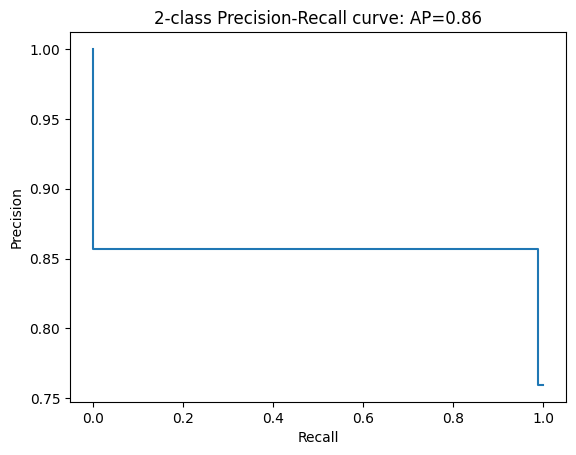

In [88]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)

disp = PrecisionRecallDisplay(precision=precision, recall=recall).plot().ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [89]:
from sklearn.metrics import classification_report
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)

{'0': {'precision': 0.9230769230769231,
  'recall': 0.48,
  'f1-score': 0.631578947368421,
  'support': 25},
 '1': {'precision': 0.8571428571428571,
  'recall': 0.9873417721518988,
  'f1-score': 0.9176470588235295,
  'support': 79},
 'accuracy': 0.8653846153846154,
 'macro avg': {'precision': 0.8901098901098901,
  'recall': 0.7336708860759493,
  'f1-score': 0.7746130030959752,
  'support': 104},
 'weighted avg': {'precision': 0.8729923922231614,
  'recall': 0.8653846153846154,
  'f1-score': 0.8488806858775899,
  'support': 104}}

## SCV

In [90]:
from sklearn.svm import SVC

In [91]:
clf_svc = sklearn.svm.SVC(C=0.7,random_state=42,kernel='linear')
clf_svc

SVC(C=0.7, kernel='linear', random_state=42)

In [92]:
clf_svc.fit(X_train,y_train)

SVC(C=0.7, kernel='linear', random_state=42)

In [98]:
y_pred = clf_svc.predict(X_test)

In [99]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[ 9, 16],
       [ 1, 78]])

In [100]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.8365384615384616

In [101]:
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)

{'0': {'precision': 0.9,
  'recall': 0.36,
  'f1-score': 0.5142857142857143,
  'support': 25},
 '1': {'precision': 0.8297872340425532,
  'recall': 0.9873417721518988,
  'f1-score': 0.9017341040462428,
  'support': 79},
 'accuracy': 0.8365384615384616,
 'macro avg': {'precision': 0.8648936170212767,
  'recall': 0.6736708860759494,
  'f1-score': 0.7080099091659786,
  'support': 104},
 'weighted avg': {'precision': 0.846665302782324,
  'recall': 0.8365384615384616,
  'f1-score': 0.8085974718922697,
  'support': 104}}

## Logistic Regression

In [106]:
clf_lr = sklearn.linear_model.LogisticRegression(random_state=42,max_iter=500)
clf_lr

LogisticRegression(max_iter=500, random_state=42)

In [107]:
clf_lr.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [108]:
y_pred = clf_lr.predict(X_test)

In [109]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[11, 14],
       [ 1, 78]])

In [110]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.8557692307692307

In [111]:
classification_report(y_true=y_test, y_pred=y_pred,output_dict=True)

{'0': {'precision': 0.9166666666666666,
  'recall': 0.44,
  'f1-score': 0.5945945945945945,
  'support': 25},
 '1': {'precision': 0.8478260869565217,
  'recall': 0.9873417721518988,
  'f1-score': 0.9122807017543859,
  'support': 79},
 'accuracy': 0.8557692307692307,
 'macro avg': {'precision': 0.8822463768115942,
  'recall': 0.7136708860759494,
  'f1-score': 0.7534376481744902,
  'support': 104},
 'weighted avg': {'precision': 0.8643743032329988,
  'recall': 0.8557692307692307,
  'f1-score': 0.8359138490717439,
  'support': 104}}

## Predicting the test data

In [112]:
t_columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
t_columns = ['Gender','Married','Education','Self_Employed','Property_Area']
df_test = pd.read_csv("data/loan/test_loan_predection.csv",usecols=t_columns_retained)
df_test = df_test.dropna(how='any')
df_test =  pd.get_dummies(df_test,columns=t_columns,drop_first=True)
df_test['Dependents'] = df_test.Dependents.apply(lambda x: int(str(x).replace('+','')))

In [113]:
df_test.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [114]:
y_pred_test = clf.predict(df_test)